## Case Study 1(Cervical Cancer Risk Classification)    
    
   
    Age
    Number of sexual partners
    First sexual intercourse
    Num of pregnancies
    Smokes
    Smokes (years)
    Smokes (packs/year)
    Hormonal Contraceptives
    Hormonal Contraceptives (years)
    IUD
    IUD (years)
    STDs
    STDs (number)
    STDs:condylomatosis
    STDs:cervical condylomatosis
    STDs:vaginal condylomatosis
    STDs:vulvo-perineal condylomatosis
    STDs:syphilis
    STDs:pelvic inflammatory disease
    STDs:genital herpes
    STDs:molluscum contagiosum
    STDs:AIDS
    STDs:HIV
    STDs:Hepatitis B
    STDs:HPV
    STDs: Number of diagnosis
    STDs: Time since first diagnosis
    STDs: Time since last diagnosis
    Dx:Cancer
    Dx:CIN
    Dx:HPV
    Dx
    Hinselmann
    Schiller
    Citology
    Biopsy

### 1.1 import some necessary librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
#from sklearn.model_selection import train_test_split

### 1.2 import and put the train and test datasets in  pandas dataframe

In [2]:
df =pd.read_csv(r'C:\Users\SRK\Desktop\siva_python\w2\1.+cervicalcancer-original+dataset.csv')

In [3]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
df.shape

(858, 36)

### 1.3 check the data.describe()

In [5]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.4 Replacing ;?' with null values in each column?


In [6]:
df.replace('?',np.nan,inplace =True)

### 1.5 Check count of 0 means not cancer affected and 1 means cancer affected cell


In [7]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [8]:
df.Biopsy.value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

observation:
   


### 1.6 Check Correlation Plot. And your observations?

In [9]:
# correlation plot
df.corr()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
STDs: Number of diagnosis,-0.001606,1.000000,-0.015423,0.008070,-0.015423,-0.002289,0.076787,0.130873,0.055114,0.097449
Dx:Cancer,0.110340,-0.015423,1.000000,-0.015072,0.886508,0.665647,0.134264,0.157812,0.113446,0.160905
Dx:CIN,0.061443,0.008070,-0.015072,1.000000,-0.015072,0.606939,-0.021233,0.009119,-0.023938,0.113172
Dx:HPV,0.101722,-0.015423,0.886508,-0.015072,1.000000,0.616327,0.134264,0.157812,0.113446,0.160905
Dx,0.092635,-0.002289,0.665647,0.606939,0.616327,1.000000,0.072215,0.098952,0.088740,0.157607
Hinselmann,-0.003967,0.076787,0.134264,-0.021233,0.134264,0.072215,1.000000,0.650249,0.192467,0.547417
Schiller,0.103283,0.130873,0.157812,0.009119,0.157812,0.098952,0.650249,1.000000,0.361486,0.733204
Citology,-0.016862,0.055114,0.113446,-0.023938,0.113446,0.088740,0.192467,0.361486,1.000000,0.327466
Biopsy,0.055956,0.097449,0.160905,0.113172,0.160905,0.157607,0.547417,0.733204,0.327466,1.000000


#### observation:
    

the target varable biopsy is correlated well with hinselmann and schiller followed by citology.

### 1.6a) list the heatmap of top correlation


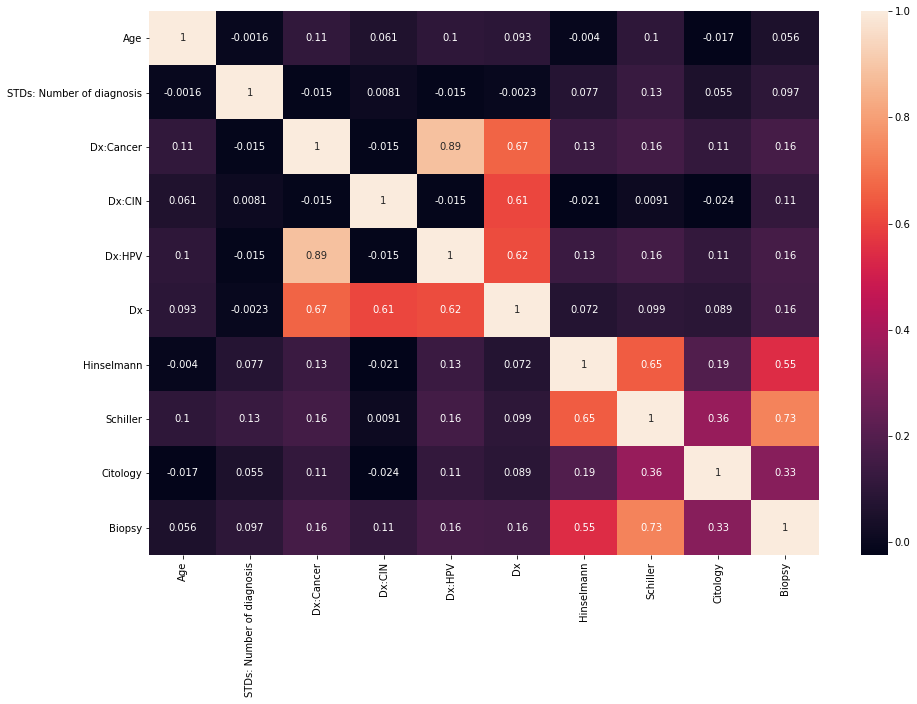

In [10]:
# list the heatmap of top correlation

fig ,axes =plt.subplots(1,figsize=(15,10) )
sns.heatmap(df.corr(),annot=True, )

# number of variables for heatmap


#total 10 varaibles in which 3 are more correlated.

#### observation:
    

the target varable biopsy is correlated well with hinselmann and schiller followed by citology.

In [11]:
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

### 1.7 Imputing the missing values from the given dataset?

In [12]:
# we will impute the categorical variables with 0 or 1 and continuous variables with median value


In [13]:
df['Num of pregnancies'].value_counts()

1.0     270
2.0     240
3.0     139
4.0      74
5.0      35
6.0      18
0.0      16
7.0       6
8.0       2
11.0      1
10.0      1
Name: Num of pregnancies, dtype: int64

In [14]:
# Imputing the missing values from First sexual intercourse
df['Number of sexual partners'].fillna(df['Number of sexual partners'].median(),inplace =True)
df['First sexual intercourse'].fillna(df['First sexual intercourse'].median(),inplace =True)



In [15]:
#df['Num of pregnancies'] = df['Num of pregnancies'].astype(np.float)


In [16]:
# Imputing the missing values from Num of pregnancies

df['Num of pregnancies'].fillna(df['Num of pregnancies'].median(),inplace =True)
#apply(np.median)


In [17]:
# Imputing the missing values from Smokes

df['Smokes'].fillna(df['Smokes'].median(),inplace =True)


In [18]:
# Imputing the missing values from Smokes (years)
df['Smokes (years)'].fillna(df['Smokes (years)'].median(),inplace =True)



In [19]:
# Imputing the missing values from Smokes (packs/year)
df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median(),inplace =True)



In [20]:
# Imputing the missing values from Hormonal Contraceptives
df['Hormonal Contraceptives'].fillna(1.0,inplace =True)



In [21]:
# Imputing the missing values from Hormonal Contraceptives (years)

df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median(),inplace =True)


In [22]:
# Imputing the missing values from IUD

df['IUD'].fillna(0.0,inplace =True)


In [23]:
# Imputing the missing values from IUD (years)
df['IUD (years)'].fillna(df['IUD (years)'].median(),inplace =True)



In [24]:
# Imputing the missing values from STDs

df['STDs'].fillna(0.0,inplace =True)


In [25]:
# Imputing the missing values from STDs (number)

df['STDs (number)'].fillna(0.0,inplace =True)


In [26]:
# Imputing the missing values from STDs:condylomatosis
df['STDs:condylomatosis'].fillna(0.0,inplace =True)



In [27]:
# Imputing the missing values from STDs:cervical condylomatosis
df['STDs:cervical condylomatosis'].fillna(0.0,inplace =True)



In [28]:
# Imputing the missing values from STDs:vaginal condylomatosis

df['STDs:vaginal condylomatosis'].fillna(0.0,inplace =True)


In [29]:
# Imputing the missing values from STDs:vulvo-perineal condylomatosis

df['STDs:vulvo-perineal condylomatosis'].fillna(0.0,inplace =True)


In [30]:
# Imputing the missing values from STDs:syphilis
df['STDs:syphilis'].fillna(0.0,inplace =True)



In [31]:
# Imputing the missing values from STDs:pelvic inflammatory diseases

df['STDs:pelvic inflammatory disease'].fillna(0.0,inplace =True)


In [32]:
# Imputing the missing values from STDs:genital herpes

df['STDs:genital herpes'].fillna(0.0,inplace =True)


In [33]:
# Imputing the missing values from STDs:molluscum contagiosum
df['STDs:molluscum contagiosum'].fillna(0.0,inplace =True)


In [34]:
# Imputing the missing values from STDs:AIDS
df['STDs:AIDS'].fillna(0.0,inplace =True)



In [35]:
# Imputing the missing values from STDs:HIV
df['STDs:HIV'].fillna(0.0,inplace =True)


In [36]:
# Imputing the missing values from STDs:Hepatitis B
df['STDs:Hepatitis B'].fillna(0.0,inplace =True)


In [37]:
# Imputing the missing values from STDs:HPV

df['STDs:HPV'].fillna(0.0,inplace =True)


In [38]:
# Imputing the missing values from STDs: Time since first diagnosis

df['STDs: Time since first diagnosis'].fillna(df['STDs: Time since first diagnosis'].median(),inplace =True)


In [39]:
# Imputing the missing values from STDs: Time since last diagnosis
df['STDs: Time since last diagnosis'].fillna(df['STDs: Time since last diagnosis'].median(),inplace =True)



In [40]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

###  1.8 Imputing null values for categorical variables for get_dummies

In [42]:
cat =[i for i in df.columns if df[i].dtype =='object']

df = pd.get_dummies(df,columns =cat,drop_first=True)
df.head()


,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,...,STDs: Time since last diagnosis_2.0,STDs: Time since last diagnosis_21.0,STDs: Time since last diagnosis_22.0,STDs: Time since last diagnosis_3.0,STDs: Time since last diagnosis_4.0,STDs: Time since last diagnosis_5.0,STDs: Time since last diagnosis_6.0,STDs: Time since last diagnosis_7.0,STDs: Time since last diagnosis_8.0,STDs: Time since last diagnosis_9.0
0,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
cat1 =[i for i in df.columns if df[i].dtype =='object']
cat1

[]

In [50]:
df.shape

(858, 283)

### 1.10 Data Visualization for checking any categorical variables or not using count plot?

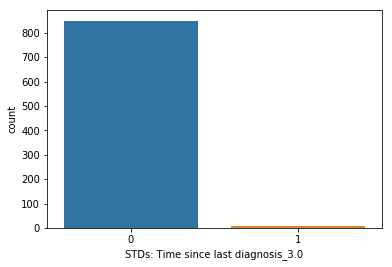

In [46]:
sns.countplot('STDs: Time since last diagnosis_3.0', data =df)

In [44]:
the countplot  works for catagorical variables if we use that particular type of column available.

SyntaxError: invalid syntax (<ipython-input-44-f4a0c50b2a3d>, line 1)

### 1.11 splitting the dataset into dependent and independent variables?

In [ ]:
y = df['Biopsy']
x = df.drop('Biopsy',axis =1)


### 1.12 splitting the dataset into  training and test set?

In [ ]:
x_train,x_test,y_train,y_test, = train_test_split(x,y,train_size =0.7,random_state =0)
print('size of xtrain is',x_train.shape)
print('size of ytrain is',y_train.shape)
print('size of xtext is',x_test.shape)
print('size of ytext is',y_test.shape)

# The End